In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

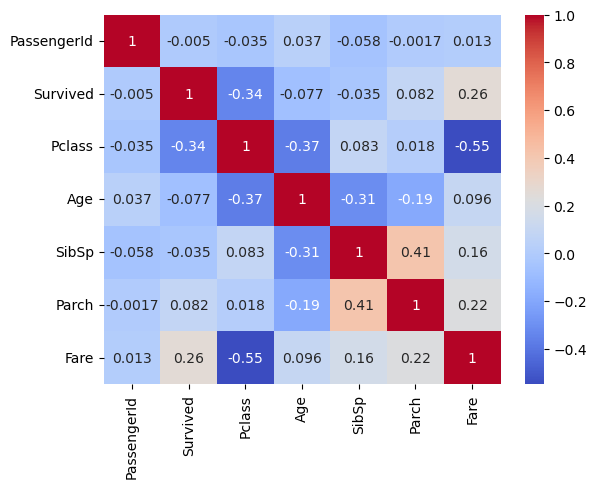

In [4]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',annot=True)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(df, df[["Survived", "Pclass", "Sex"]]):
    train_set = df.loc[train_indices]
    test_set = df.loc[test_indices]

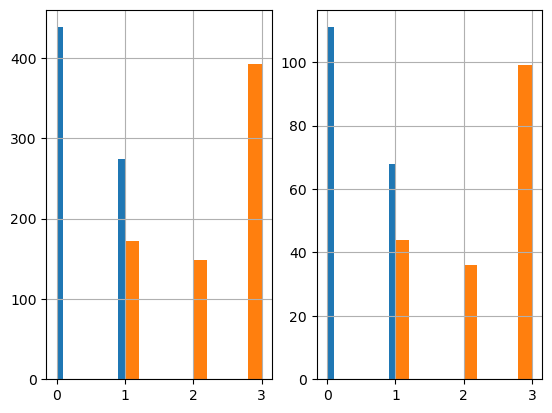

In [6]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()

plt.show()

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 445 to 600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self,X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [46]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_name = ["C","S","Q","N"]
    
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
    
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
    
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
    
        return X

In [54]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', "N"], axis=1, errors="ignore")

In [56]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()),
                     ('featureencoder', FeatureEncoder()),
                     ('featuredropper', FeatureDropper())])

In [58]:
train_set = pipeline.fit_transform(train_set)

In [60]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
445,446,1,1,4.0,0,2,81.8583,0.0,0.0,1.0,0.0,1.0
251,252,0,3,29.0,1,1,10.4625,0.0,0.0,1.0,1.0,0.0
378,379,0,3,20.0,0,0,4.0125,1.0,0.0,0.0,0.0,1.0
230,231,1,1,35.0,1,0,83.4750,0.0,0.0,1.0,1.0,0.0
170,171,0,1,61.0,0,0,33.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,19.0,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
233,234,1,3,5.0,4,2,31.3875,0.0,0.0,1.0,1.0,0.0
412,413,1,1,33.0,1,0,90.0000,0.0,1.0,0.0,1.0,0.0
164,165,0,3,1.0,4,1,39.6875,0.0,0.0,1.0,0.0,1.0


In [62]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 445 to 600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [68]:
from sklearn.preprocessing import StandardScaler

X = train_set.drop(['Survived'], axis=1)
y = train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = y.to_numpy()


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [74]:
final_clf = grid_search.best_estimator_

In [76]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=200)

In [80]:
test_set = pipeline.fit_transform(test_set)

In [82]:
X_test = test_set.drop(['Survived'], axis=1)
y_test = test_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X_test)
Y_data = y_test.to_numpy()

In [84]:
final_clf.score(X_data, Y_data)

0.8212290502793296

In [88]:
final_data = pipeline.fit_transform(df)

In [92]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = y_final.to_numpy()

In [94]:
prod_clf = RandomForestClassifier()

param_grid = [{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [96]:
prod_final_clf = grid_search.best_estimator_

In [98]:
prod_final_clf

RandomForestClassifier(max_depth=5)

In [100]:
dff = pd.read_csv("test.csv")

In [104]:
dff = pipeline.fit_transform(dff)

In [124]:
X_final_test = dff
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\2002m\AppData\Local\Temp\ipykernel_6000\2118770525.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [126]:
prediction = prod_final_clf.predict(X_data_final_test)

In [132]:
final_df = pd.DataFrame(dff['PassengerId'])
final_df ['Survived'] = prediction
final_df.to_csv('predictions.csv', index=False)

In [134]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
